In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:09<00:00, 165MB/s]
100% 1.06G/1.06G [00:09<00:00, 116MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

#generators
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [15]:
# create CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 0.5908 - accuracy: 0.6859 - val_loss: 0.5888 - val_accuracy: 0.6954
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4644 - accuracy: 0.7763 - val_loss: 0.5049 - val_accuracy: 0.7688
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3730 - accuracy: 0.8349 - val_loss: 0.5663 - val_accuracy: 0.7320
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2617 - accuracy: 0.8917 - val_loss: 0.5515 - val_accuracy: 0.7740
Epoch 5/10
625/625 [==============================] - 68s 107ms/step - loss: 0.1593 - accuracy: 0.9389 - val_loss: 0.5077 - val_accuracy: 0.8054
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0983 - accuracy: 0.9633 - val_loss: 0.5387 - val_accuracy: 0.8198
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.0651 - accuracy: 0.9770 - val_loss: 0.6757 - val_ac

<function matplotlib.pyplot.show(close=None, block=None)>

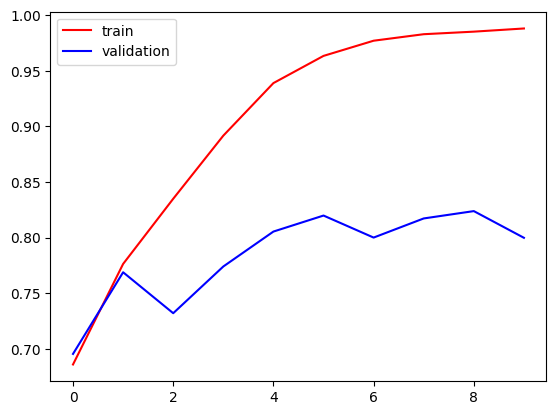

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show

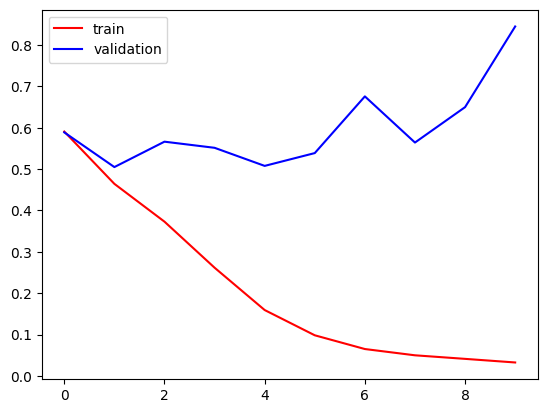

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()